# SL1 - Linear regression
## Data analysis of the imdb database

The dataset can be obtained from https://www.kaggle.com/karrrimba/movie-metadatacsv

We will use the pandas library for Python. Some tutorials can be found at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reading csv data
data = pd.read_csv("./Data/movie_metadata.csv")

In [5]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
# Rapid description of the data
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
# Dropping data lines with NaN
data.dropna(how='any',inplace=True)

## Plotting data

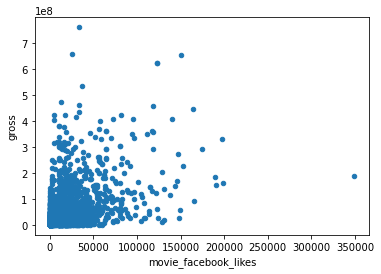

In [8]:
data_sample = data[data.movie_facebook_likes > 0]
data_sample.plot.scatter("movie_facebook_likes","gross")
plt.show()

### Question 1
Plot different variables and see whether you can spot some correlations. 

## Gradient descent algorithm

We want to find a linear regression between x = log(budget) and y = log(gross).

The linear regression consists in the hypothesis

$h_\theta (x) = \theta_0 + \theta_1 x$

with the cost function

$J(\theta_0, \theta_1) = \frac{1}{2N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$

The iterative procedure of the gradient descent algorithm is then 

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$

with $\alpha$ the learning parameter and 

$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)$

$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)x^{(i)}$

In [ ]:
x = np.log(np.array(data["budget"]))
y = np.log(np.array(data["gross"]))
plt.plot(x,y,'.')
plt.show()

### Question 2
- Complete the following code to implement a gradient descent algorithm
- Check how the convergence varies with $\alpha$ (a plot of J as a function of t may help)

In [ ]:
T = 100  # number of steps
alpha = 0.003  # learning parameter
theta0 = 3.  # initial value
theta1 = 1.  # initial value
N = len(x)  

#for t in range(T):
#    for i in range(N):
       

### Plotting the result

In [ ]:
plt.plot(x,y,'.')
plt.plot(x,theta0 + theta1 * x)
plt.show()

### Question 3
The gradient descent algorithm can be improved.
- Implement the same gradient descent algorithm but with rescaled data
- Implement the algorithm with stochastic gradient descent (at each time step a data is randomly picked and the parameters are updated with this single data, N=1)
- Implement the algorithm with mini-batches (at each time step n<N data are randomly picked and the parameters are updated with this data)

In [ ]:
x_rescaled = (x - np.mean(x)) / np.std(x)
#...

## Regression by direct method
The parameters $\theta_0$ and $\theta_1$ can also be obtained by the direct method

$\theta_1 = {\langle (x - \langle x \rangle) (y - \langle y \rangle)} \,/\, {\langle(x - \langle x \rangle)^2\rangle}$

$\theta_0 = \langle y \rangle - \theta_1 \langle x \rangle$

### Question 4
Complete the code below to calculate $\theta_0$ and $\theta_1$ directly.

In [ ]:
x = data["budget"].apply(np.log)
xm = x.mean()
#...

### Question 5
Compare the different methods graphically and discuss why the results may be different. 